# Réseau convolutif

Objectif : construction d'un réseau convolutif simple avec Keras. 
De nombreuses possibilités d'amélioration :
- optimisation du nombre de couches / noyaux / activations
- architecture
- régularisation
- ...

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam


2024-10-28 09:14:14.952101: E external/local_xla/xla/stream_executor/plugin_registry.cc:93] Invalid plugin kind specified: DNN
2024-10-28 09:14:15.001982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpu=tensorflow.config.experimental.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(gpu[0], True)

2024-10-28 09:14:20.769401: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-28 09:14:20.869507: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-28 09:14:20.869556: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

# Conversion en matrices binaires
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Définition du réseau

## Paramètres

In [11]:
lr = 0.001
num_epochs = 100
batch_size = 128
dropout = 0.75 # ici probabilité de garder le neurone

## Types de couches

## Modèle du réseau construit 
CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING-FCL-Dropout-Prediction

In [12]:
#TODO
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

2024-10-28 09:19:54.374444: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.375737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.385526: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.388184: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.407281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.409420: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.426146: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:19:54.428097: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


## Fonction de coût et optimisation

In [13]:
#TODO
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['acc'])

# Entraînement du réseau

In [14]:
#TODO
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1)

Epoch 1/100


2024-10-28 09:20:06.861508: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.863143: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.870450: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.871356: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.894073: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.895287: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.951437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.952376: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06.959047: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:20:06

469/469 [==============================] - 4s 8ms/step - loss: 0.2122 - acc: 0.9327
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - acc: 0.9799
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0456 - acc: 0.9858
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0359 - acc: 0.9887
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0305 - acc: 0.9904
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0247 - acc: 0.9923
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0244 - acc: 0.9924
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0190 - acc: 0.9938
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0183 - acc: 0.9938
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0150 - acc: 0.9954
Epoch 11/100
469/469 [============================

2024-10-28 09:26:18.244761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.246141: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.259980: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.261750: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.279163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.282025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.291924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.292939: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18.299925: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:18

KeyError: 'val_acc'

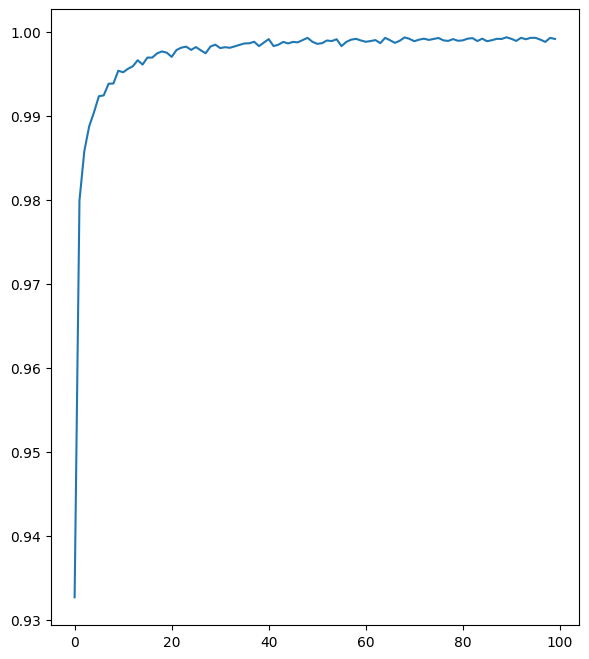

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

 42/313 [===>..........................] - ETA: 0s

2024-10-28 09:26:26.389598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.390710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.397579: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.398803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.407874: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.408921: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.416269: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.417095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26.422218: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:26:26

313/313 [==============================] - 1s 2ms/step
Nombre d'erreurs 78/10000




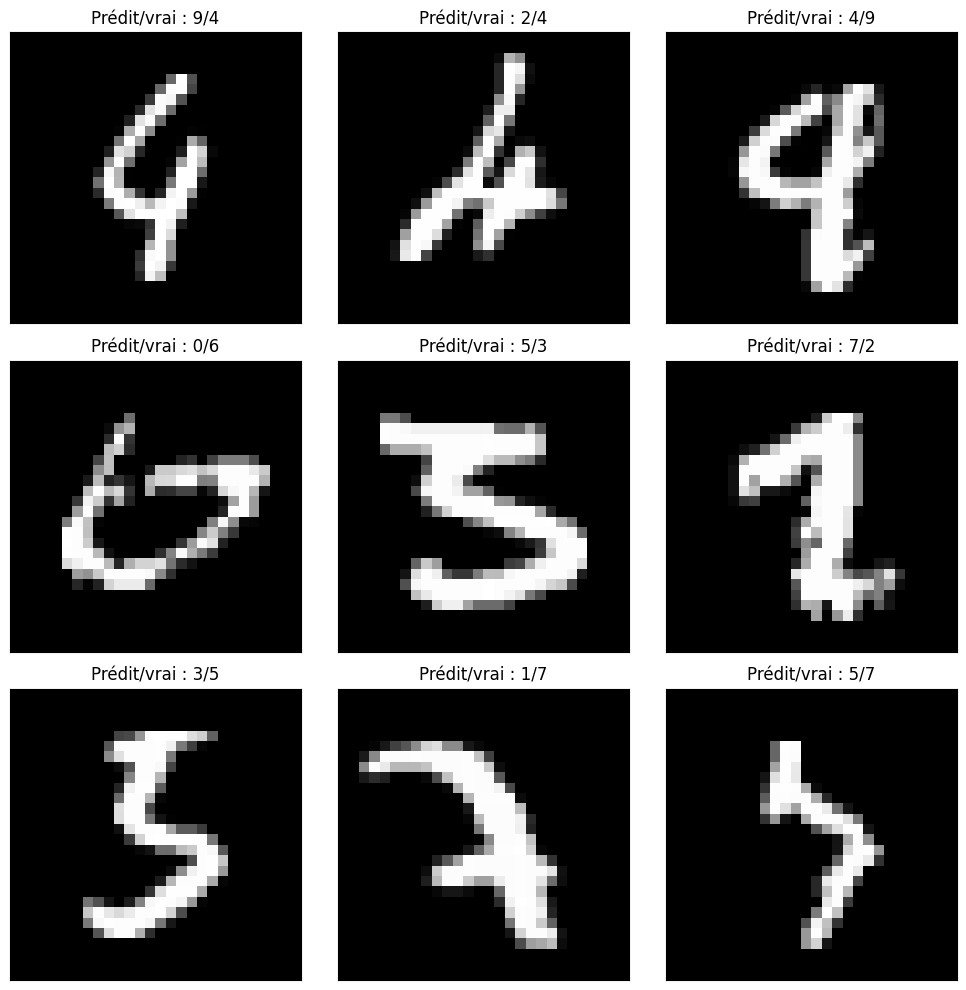

In [16]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
